<a href="https://colab.research.google.com/github/haroldcarvajalvergara/haroldcarvajalvergara/blob/main/EDA_PORTAFOLIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


## Presentación de la empresa, organización o problema específico.
Una empresa de viajes y tours turísticos ofrece paquetes de seguro a sus clientes. Actualmente la empresa está desarrollando un nuevo paquete de cobertura, debido a esto la compañía necesita saber qué clientes estarían interesados en comprarlo según el historial de su base de datos.

El seguro se ofreció a algunos de sus clientes en el año 2019 y los datos proporcionados se extrajeron del rendimiento / ventas del paquete durante ese período. Los datos recolectados son de casi 2000 de sus clientes y se requiere de un modelo estadístico que pueda predecir si el cliente estará interesado en comprar o no el paquete de seguro de viaje en función de ciertos parámetros.

# Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

El dataset se denomina Travel Insurance Prediction Data. Clasifica con la variable "TravelInsurance", la cual se utilizará para predecir si un cliente determinado querrá comprar el paquete de seguros.

Link: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

En total tiene 9 columnas en los datos, las cuáles se describen a continuación:

* Age: Edad del cliente.
* Employment Type: El sector en el que está empleada el cliente.

* Graduate or Not: Si el cliente es graduado universitario o no.

* Annual Income: El ingreso anual del cliente en rupias indias.

* Family Members: Número de miembros en la familia del cliente.

* Chronic Disease: Si el cliente sufre de alguna enfermedad o condición importante como diabetes, presión arterial alta o asma, etc.

* Frequent Flyer: Indica si el cliente ha realizado al menos cuatro viajes a diferentes locaciones en los últimos dos años (2017-2019).

* Ever Travelled Abroad: Indica si el cliente ha realizado alguna vez un viaje a un país extranjero.

* Travel Insurance: ¿El cliente compró un paquete de seguro de viaje durante la oferta de lanzamiento celebrada en el año 2019.

In [4]:
df = pd.read_csv('/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


*No contiene ninguna columna con registros nulos, desconocidos, indefinido o no inicializado.*

## Verificamos los valores unicos de cada columna de tipo object

In [6]:
objets = df.select_dtypes(include = ["object"])
for i in objets:
    unicos = df[i].unique()
    print('valores únicos de la columna ' +i )
    print(unicos)
    print()

valores únicos de la columna Employment Type
['Government Sector' 'Private Sector/Self Employed']

valores únicos de la columna GraduateOrNot
['Yes' 'No']

valores únicos de la columna FrequentFlyer
['No' 'Yes']

valores únicos de la columna EverTravelledAbroad
['No' 'Yes']



Los valores de las variables objects solo tienen 2 valores que pueden ser modificados por 0 y 1.

## Data wrangling
Eliminamos la columna que tiene los índices por no ser relevante en el análisis.

Cambiamos a valor bool (0,1) a las columnas con solamente 2 valores. En el caso de 'Employment Type', elijo a 'Government Sector' como identificador de la columna y coloco 0 o 1 en los respectivos casos.

Creamos una nueva variable "AnnualincomePercapita" que será el ingreso anual dividido los miembros de familia. Analizaremos su impacto en el modelo.

In [7]:
### WRANGLING

df.drop(columns='Unnamed: 0', inplace= True)
df = df.replace({'Yes': 1, 'No': 0})
df = df.rename(columns={"Employment Type": "Government Sector"})
df = df.replace({'Government Sector': 1, 'Private Sector/Self Employed': 0})
df['AnnualincomePercapita'] = round(df['AnnualIncome']/df['FamilyMembers'],3)
df.head()

,Age,Government Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualincomePercapita
0,31,1,1,400000,6,1,0,0,0,66666.667
1,31,0,1,1250000,7,0,0,0,0,178571.429
2,34,0,1,500000,4,1,0,0,1,125000.000
3,28,0,1,700000,3,1,0,0,0,233333.333
4,28,0,1,700000,8,1,1,0,0,87500.000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.000,28.0,29.0,32.000,35.0
Government Sector,1987.0,0.286865,0.452412,0.000,0.0,0.0,1.000,1.0
GraduateOrNot,1987.0,0.851535,0.355650,0.000,1.0,1.0,1.000,1.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.000,600000.0,900000.0,1250000.000,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.000,4.0,5.0,6.000,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.000,0.0,0.0,1.000,1.0
FrequentFlyer,1987.0,0.209864,0.407314,0.000,0.0,0.0,0.000,1.0
EverTravelledAbroad,1987.0,0.191243,0.393379,0.000,0.0,0.0,0.000,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.000,0.0,0.0,1.000,1.0
AnnualincomePercapita,1987.0,221469.082767,125685.960608,33333.333,130000.0,200000.0,283333.333,875000.0


## Generación del EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

###  Age

Text(0, 0.5, 'Frefuencia')

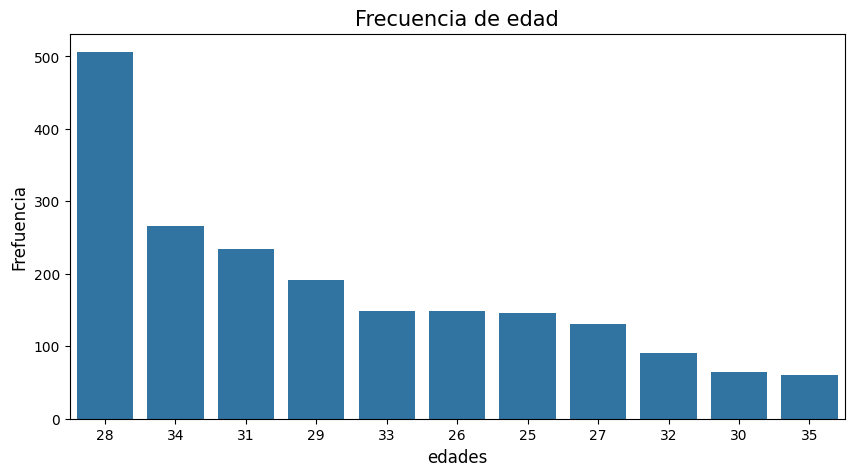

In [9]:
## conteo por edad
plt.figure(figsize=(10,5))
sns.countplot(x=df['Age'], order= df['Age'].value_counts().index)
plt.title('Frecuencia de edad',fontdict={'fontsize':15})
plt.xlabel('edades',fontdict={'fontsize':12})
plt.ylabel('Frefuencia',fontdict={'fontsize':12})

*Muestra el rango de edades con las que cuenta el dataset y la cantidad de cada una de ellas. El gráfico muestra que los clientes tienen mayoritariamente 28 años*

### AnnualIncome

Text(0, 0.5, 'Frefuencia')

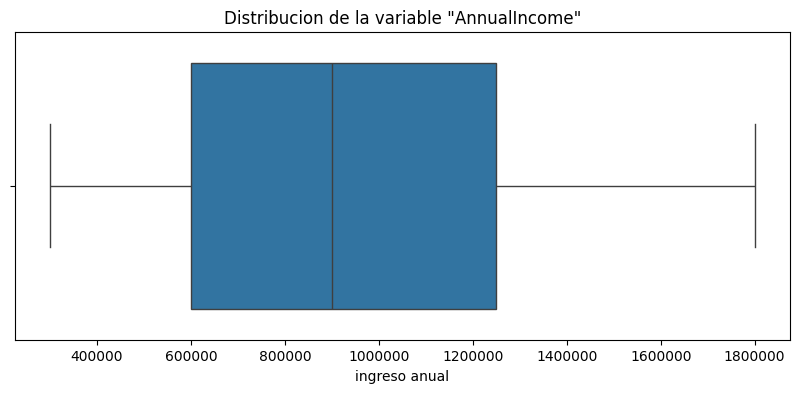

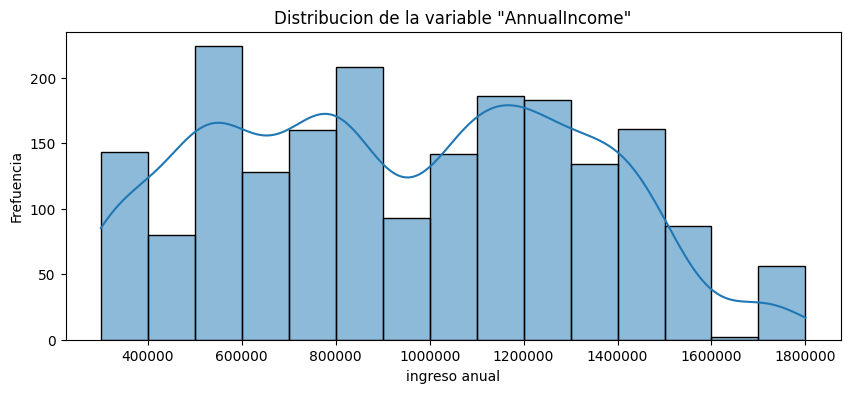

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="AnnualIncome")
plt.ticklabel_format(style='plain', axis='x')#Mantener el valor real y no en notacion cientifica
plt.title('Distribucion de la variable "AnnualIncome"',fontdict={'fontsize':12})
plt.xlabel('ingreso anual',fontdict={'fontsize':10})

plt.figure(figsize=(10,4))
sns.histplot(data=df, x="AnnualIncome", kde= True)
plt.ticklabel_format(style='plain', axis='x')#Mantener el valor real y no en notacion cientifica
plt.title('Distribucion de la variable "AnnualIncome"',fontdict={'fontsize':12})
plt.xlabel('ingreso anual',fontdict={'fontsize':10})
plt.ylabel('Frefuencia',fontdict={'fontsize':10})


Acá vemos como se distrubuye la variable 'AnnualIncome', cuya media es de 9 millones de rupias y el promedio de 9.3 millones aprox.

### Familymembers

FamilyMembers
2     93
3    377
4    505
5    426
6    294
7    178
8     59
9     55
Name: FamilyMembers, dtype: int64


Text(0, 0.5, 'Frefuencia')

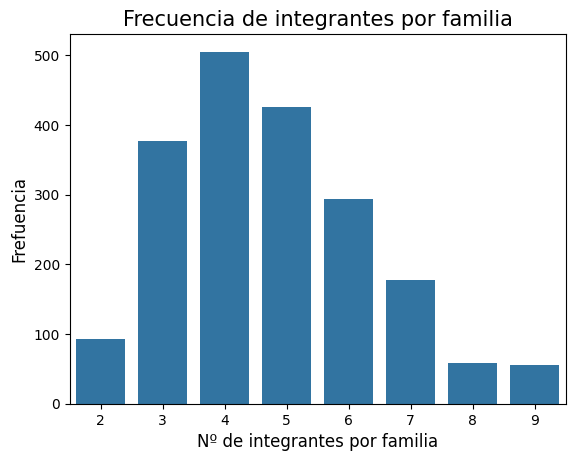

In [11]:
grouped = df['FamilyMembers'].groupby(df['FamilyMembers'])
print(grouped.count())

#Grafico
new = df.FamilyMembers.value_counts().sort_index()
sns.countplot(x=df['FamilyMembers'])
plt.title('Frecuencia de integrantes por familia',fontdict={'fontsize':15})
plt.xlabel('Nº de integrantes por familia',fontdict={'fontsize':12})
plt.ylabel('Frefuencia',fontdict={'fontsize':12})

In [12]:
df['FamilyMembers'].value_counts('%')

FamilyMembers
4    0.254152
5    0.214394
3    0.189733
6    0.147962
7    0.089582
2    0.046804
8    0.029693
9    0.027680
Name: proportion, dtype: float64

5.0

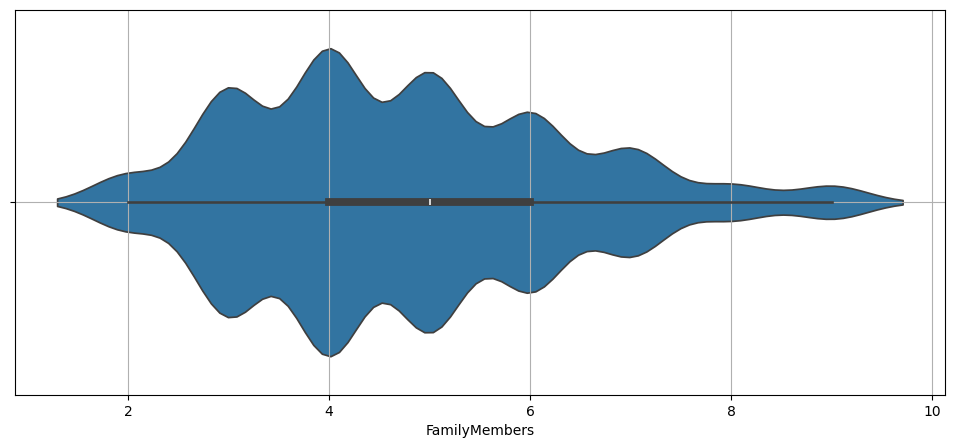

In [13]:
plt.figure(figsize=(12,5))
sns.violinplot(x=df.FamilyMembers)
plt.grid(visible=True)

np.median(df.FamilyMembers)

### A continuación podemos ver como estan distribuidas las variables categoricas del dataset.

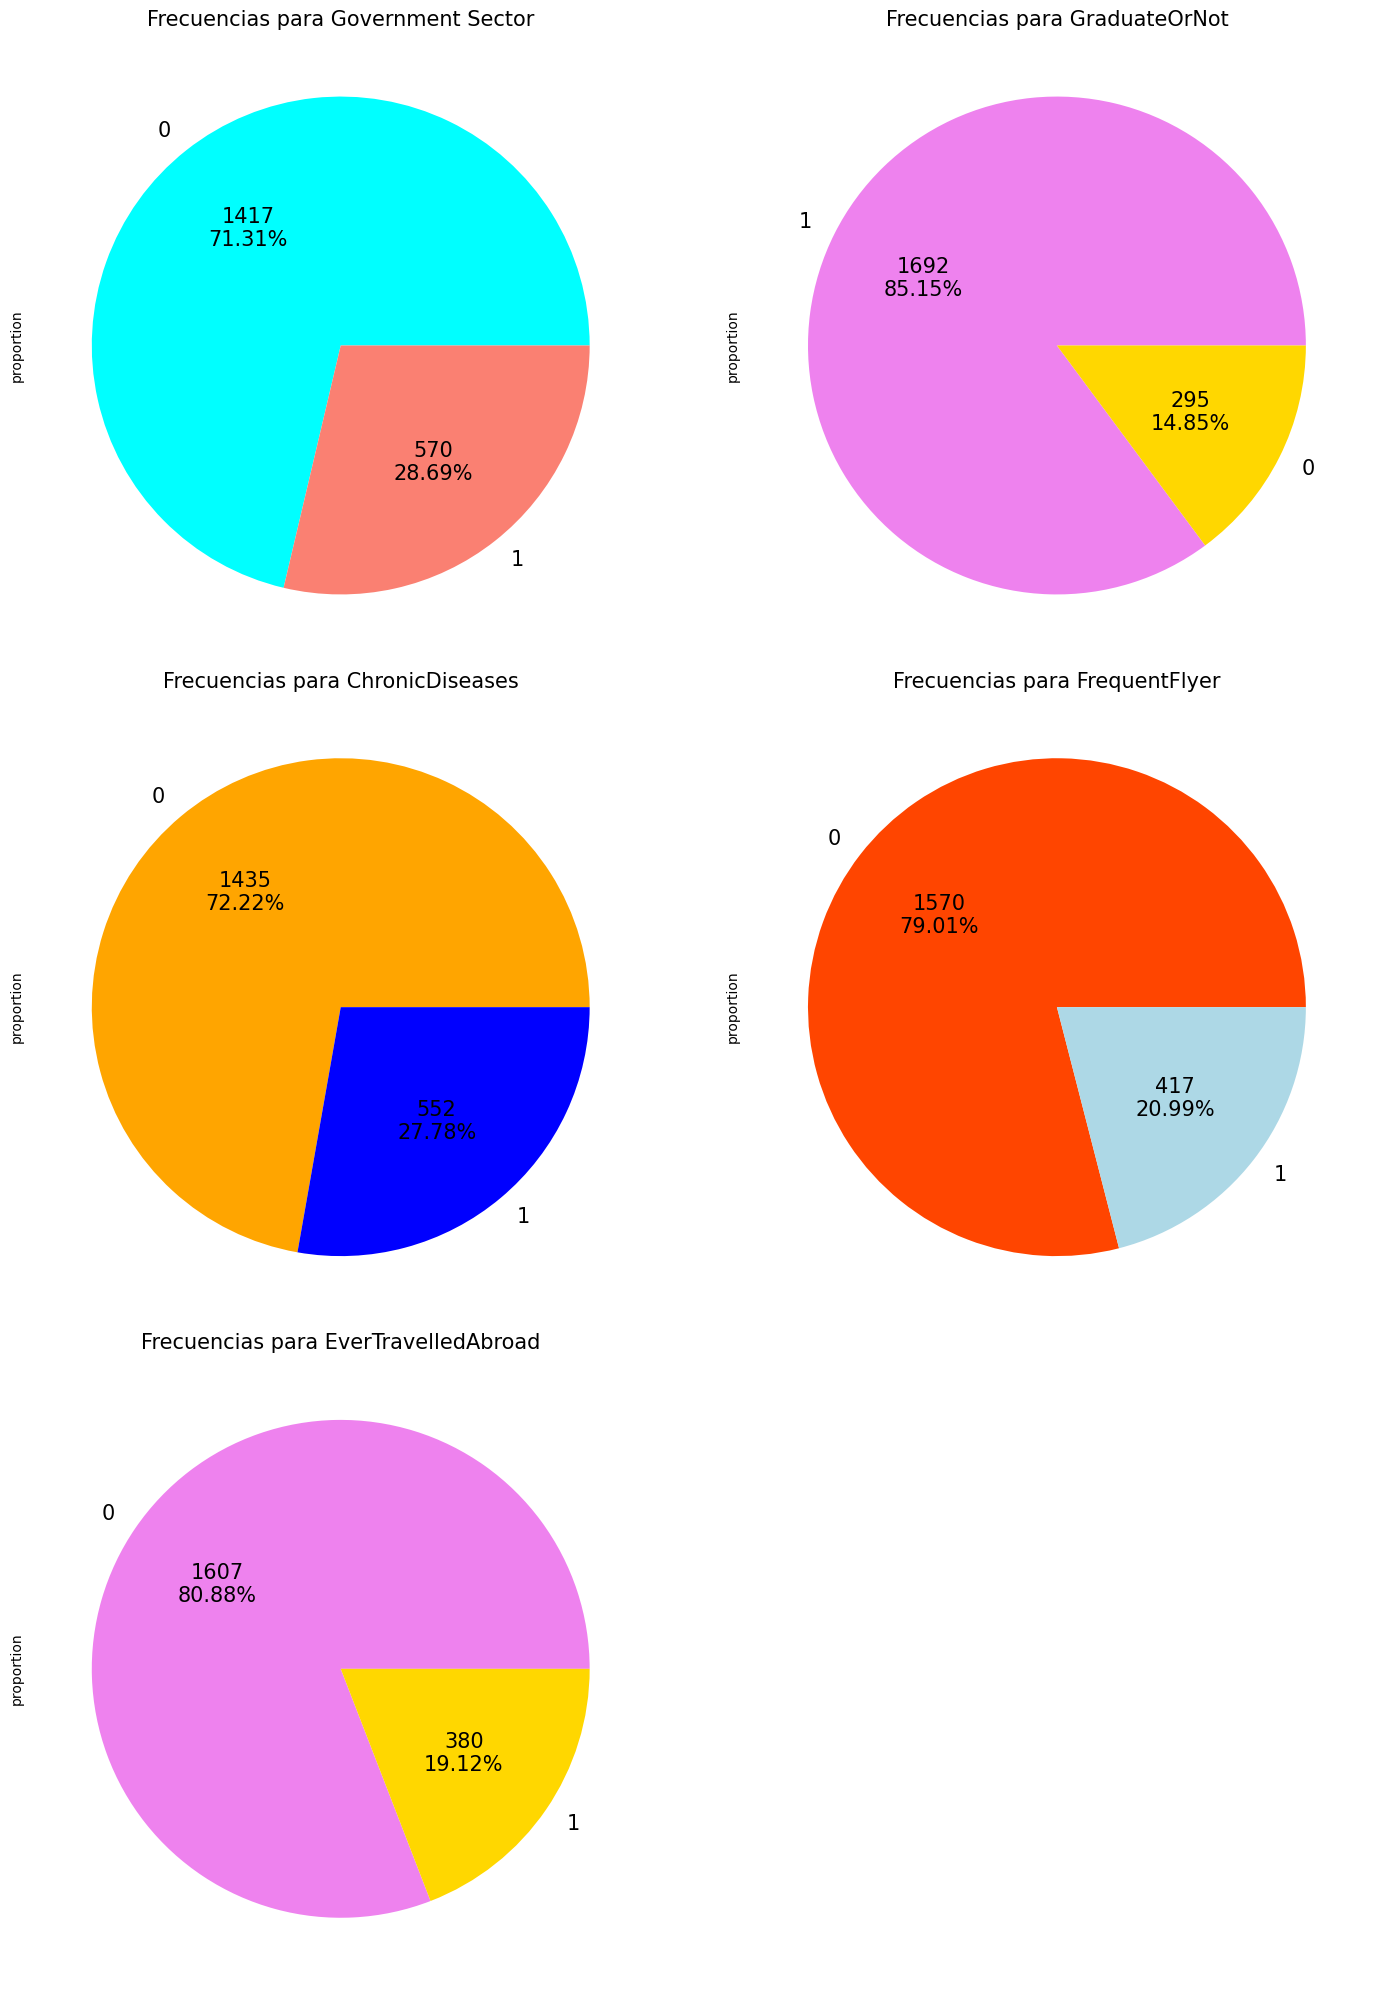

In [14]:
def porcentajes(val):
    return f'{val / 100 * len(df):.0f}\n{val:.2f}%'
plt.figure(figsize=(15,20))
columnas = ['Government Sector','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']
colores = (['aqua', 'salmon'],['violet', 'gold'],['orange', 'blue'],['orangered', 'lightblue'],['violet', 'gold'])
P=0
for i,n in zip(columnas,colores):
    plt.subplot(3, 2,P+1)
    df[i].value_counts('%').plot(kind='pie', autopct=porcentajes, textprops={'fontsize': 15},
                                 colors=n)
    plt.title('Frecuencias para {}'.format(i),fontdict={'fontsize':15})
    plt.tight_layout()
    P+=1



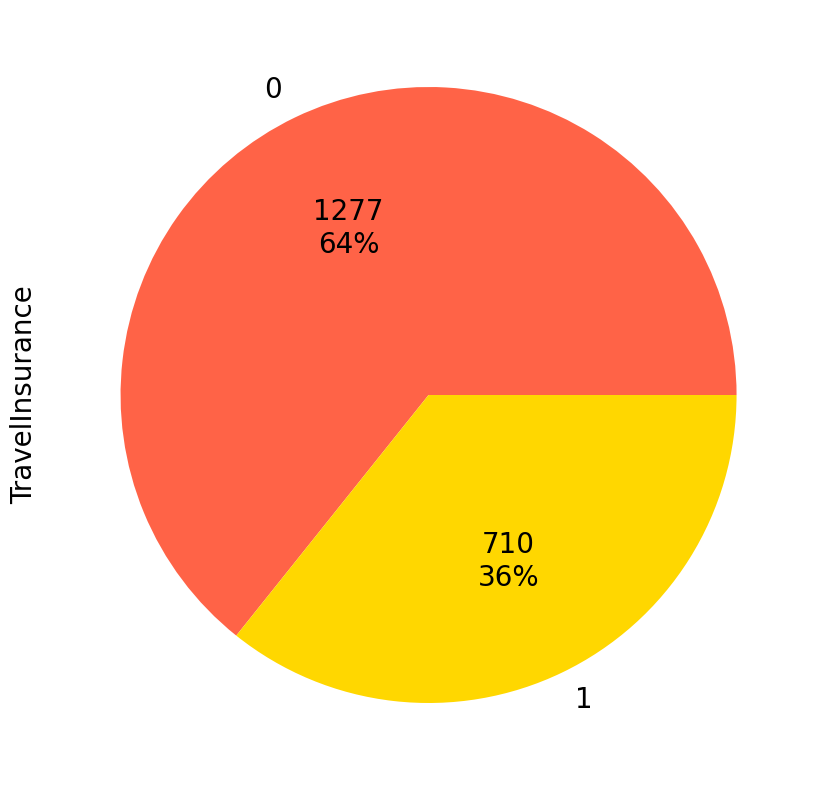

In [15]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

plt.figure(figsize=(10, 8))

df.groupby('TravelInsurance').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'])

plt.ylabel('TravelInsurance', size=20)

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

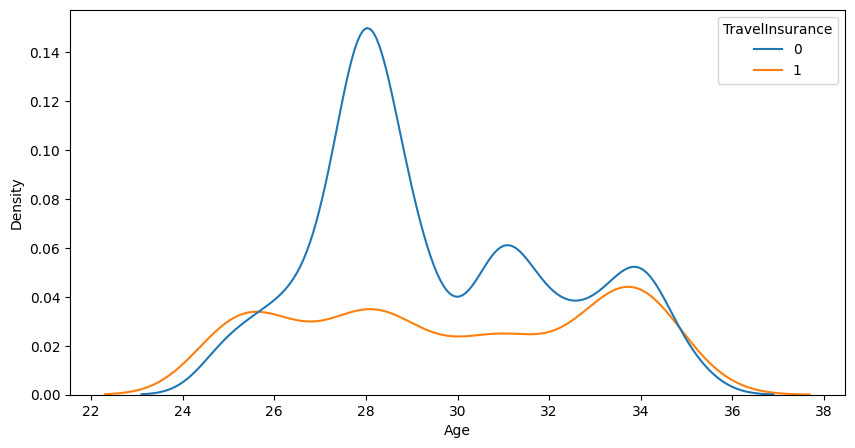

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x=df['Age'], hue = df['TravelInsurance'])


In [17]:
## distribucion de edades por asegurados y no asegurados por sector de trabajo

fig = px.box(df, x="TravelInsurance", y="AnnualIncome")
fig.show()

<ipython-input-18-288996aa62b3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




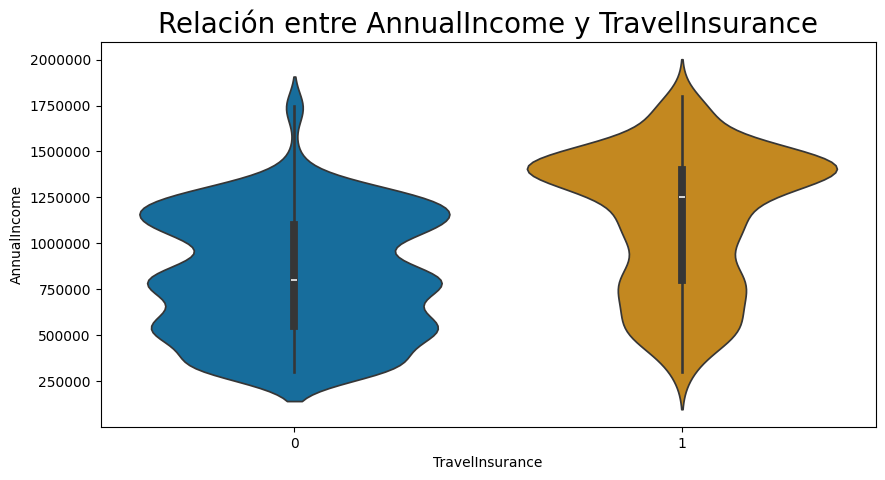

Text(0.5, 1.0, 'Relación entre AnnualIncome y TravelInsurance')

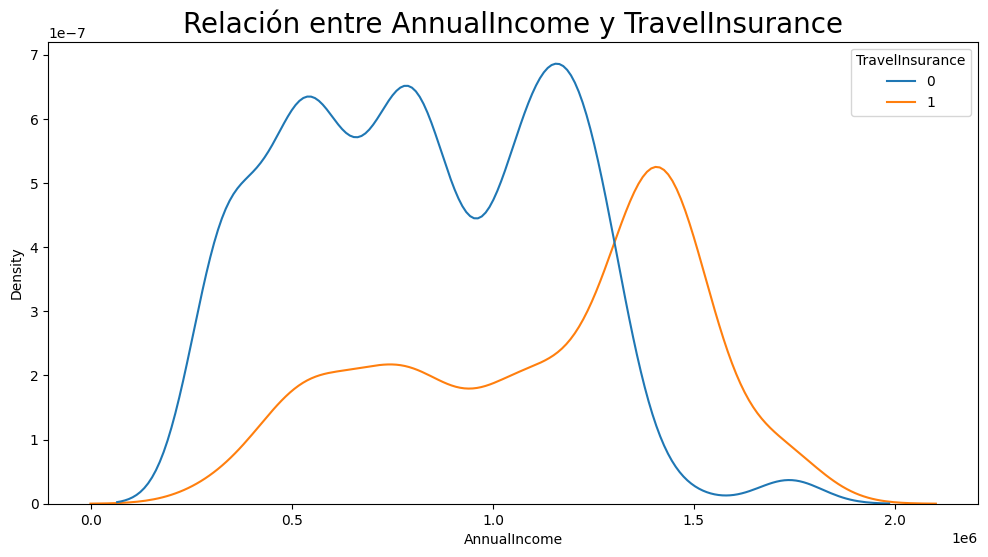

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(data= df,x=df["TravelInsurance"],y=df["AnnualIncome"], palette = 'colorblind')
plt.title('Relación entre AnnualIncome y TravelInsurance', fontsize = 20, fontweight = 30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(12,6))
sns.kdeplot(data= df, x=df['AnnualIncome'], hue= df['TravelInsurance'])
plt.title('Relación entre AnnualIncome y TravelInsurance', fontsize = 20, fontweight = 20)

<Axes: xlabel='GraduateOrNot', ylabel='count'>

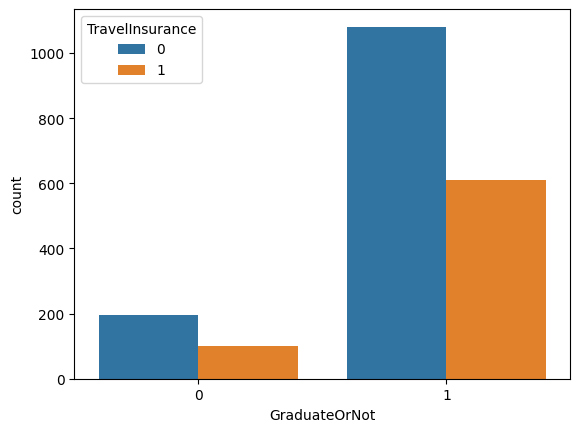

In [19]:
## graduados vs no graduados
sns.countplot(x=df['GraduateOrNot'], hue= df['TravelInsurance'])

<Axes: xlabel='Government Sector', ylabel='count'>

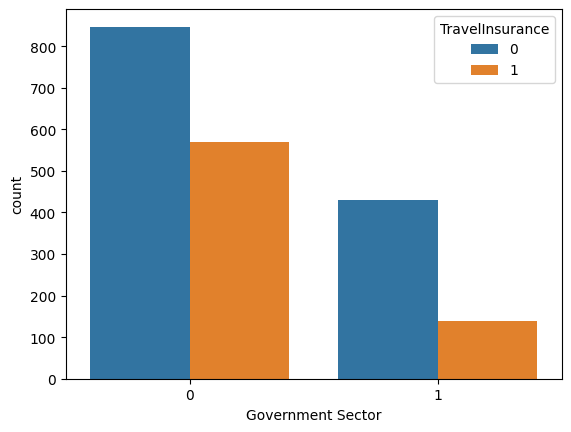

In [20]:
## sector privado vs sector gobierno

sns.countplot(x=df['Government Sector'], hue=df['TravelInsurance'])

In [21]:
111## distribución de ingresos anuales según edad
fig = px.box(df, x="Age", y="AnnualIncome")
fig.show()

In [22]:
## distribución de ingresos anuales según edad
fig = px.box(df, x="Age", y="AnnualincomePercapita")
fig.show()

<ipython-input-23-7b9e3183aab9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




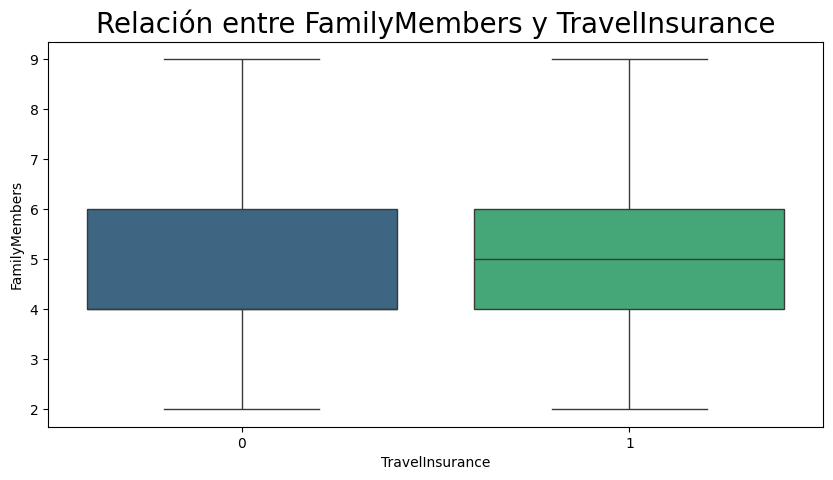

<ipython-input-23-7b9e3183aab9>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




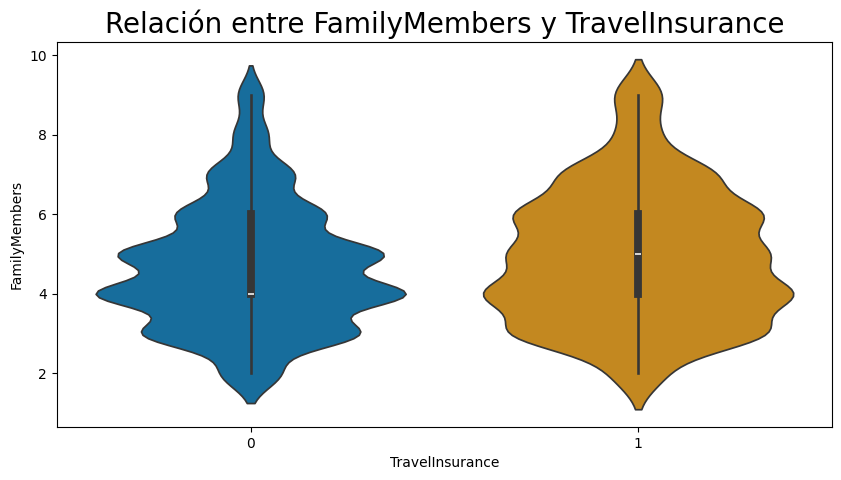

TravelInsurance
0    4.0
1    5.0
Name: FamilyMembers, dtype: float64

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot( data=df,x=df["TravelInsurance"],y=df["FamilyMembers"], palette = 'viridis')
plt.title('Relación entre FamilyMembers y TravelInsurance', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(data=df,x=df["TravelInsurance"],y=df["FamilyMembers"], palette = 'colorblind')
plt.title('Relación entre FamilyMembers y TravelInsurance', fontsize = 20, fontweight = 30)
plt.show()

familia = df['FamilyMembers'].groupby(df['TravelInsurance']).median()
familia

<Axes: xlabel='AnnualincomePercapita', ylabel='Density'>

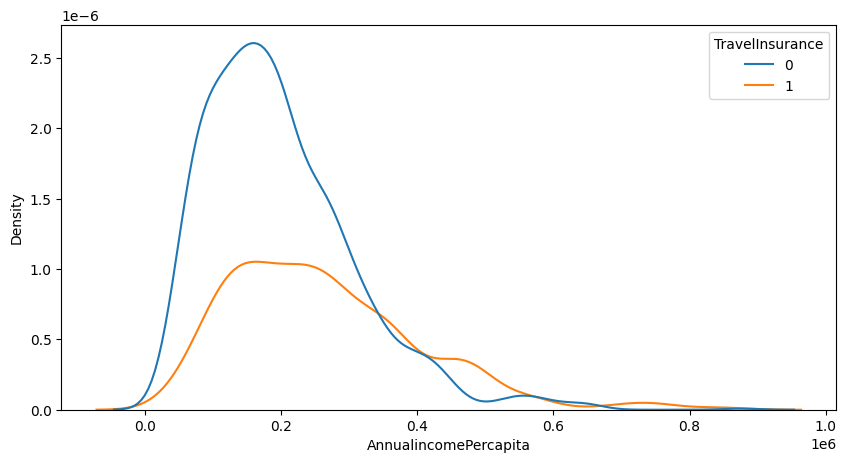

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x = df['AnnualincomePercapita'], hue = df['TravelInsurance'])

Text(0.5, 1.0, 'Matriz de confusión para método Regresión logística\n\n')

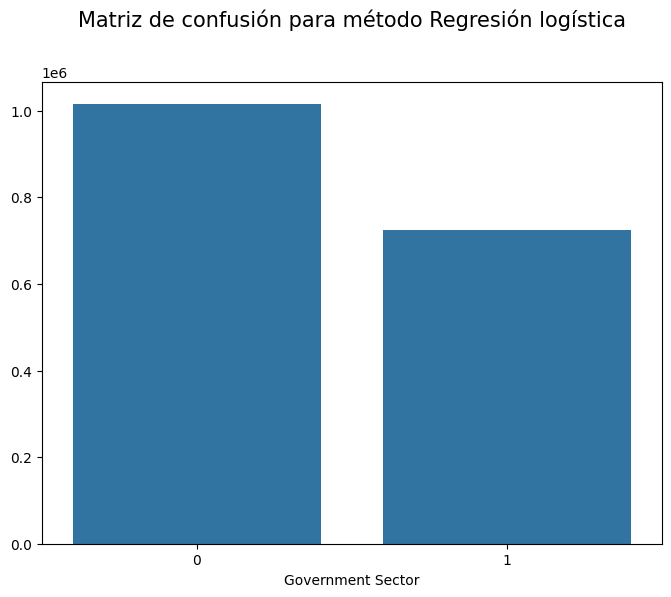

In [25]:
# ingreso anual promedio para sector privado vs gobierno

g = df.groupby('Government Sector').mean()['AnnualIncome']
plt.figure(figsize=(8,6))
sns.barplot(x= g.index, y=g.values)
plt.title('Matriz de confusión para método Regresión logística\n\n', fontdict={'fontsize':15})

TravelInsurance
1    60
0    40
Name: count, dtype: int64

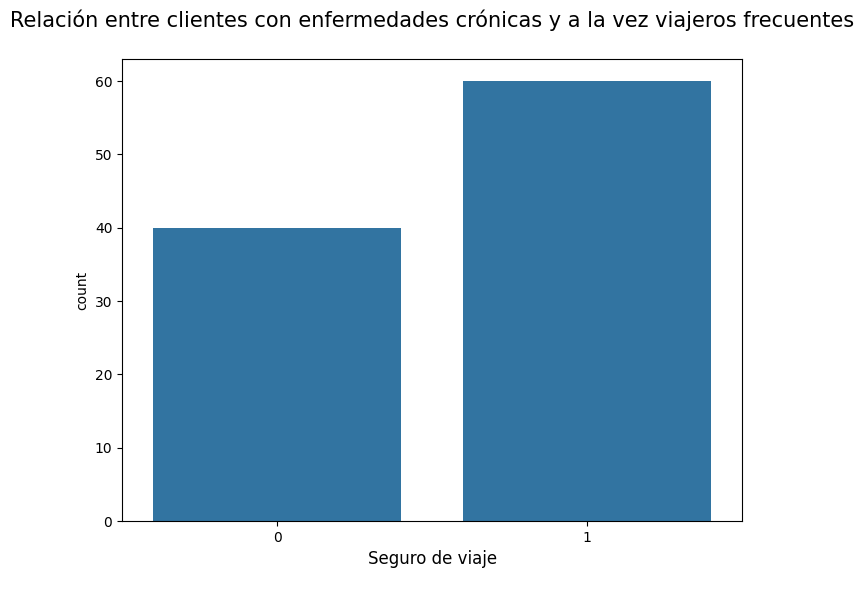

In [26]:
cdff = df[(df['FrequentFlyer']==1)&(df['ChronicDiseases']==1)]
plt.figure(figsize=(8,6))
sns.countplot(x = cdff['TravelInsurance'])
plt.title('Relación entre clientes con enfermedades crónicas y a la vez viajeros frecuentes\n', fontdict={'fontsize':15})
plt.xlabel('Seguro de viaje\n', fontdict={'fontsize':12})
cdff['TravelInsurance'].value_counts()

<ipython-input-27-15fb5a3c4275>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




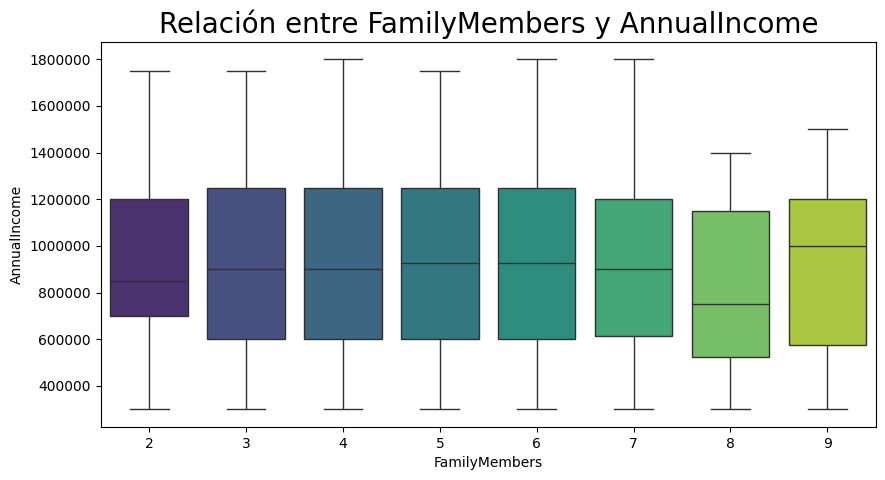

In [27]:
sns.boxplot( data=df,x=df["FamilyMembers"],y=df["AnnualIncome"], palette = 'viridis')
plt.title('Relación entre FamilyMembers y AnnualIncome', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-28-e6efdd4e9522>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




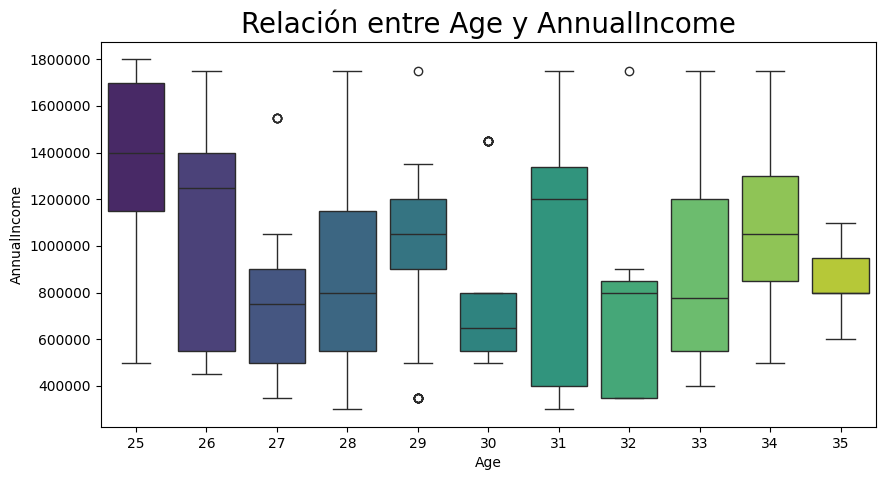

In [28]:
sns.boxplot( data=df,x=df["Age"],y=df["AnnualIncome"], palette = 'viridis')
plt.title('Relación entre Age y AnnualIncome', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [29]:
TOTAL = len(df)

In [30]:
## seguro de viaje vs no seguro de viaje segun sector de trabajo

tipotrabajo = df.groupby([df['Government Sector'],df['TravelInsurance']])['Government Sector'].count()
tipotrabajo.groupby(level=0).apply(lambda x: round((100 * x / x.sum()), 2))

Government Sector  Government Sector  TravelInsurance
0                  0                  0                  59.77
                                      1                  40.23
1                  1                  0                  75.44
                                      1                  24.56
Name: Government Sector, dtype: float64

In [31]:
tipotrabajo = df.groupby([df['Government Sector'],df['TravelInsurance']])['Government Sector'].count()
tipotrabajo.groupby(level=0).apply(lambda x: round((100 * x /TOTAL), 2))

Government Sector  Government Sector  TravelInsurance
0                  0                  0                  42.63
                                      1                  28.69
1                  1                  0                  21.64
                                      1                   7.05
Name: Government Sector, dtype: float64

Text(0.5, 1.0, 'Frecuencia de clientes de seguro de viaje segun sector de trabajo\n')

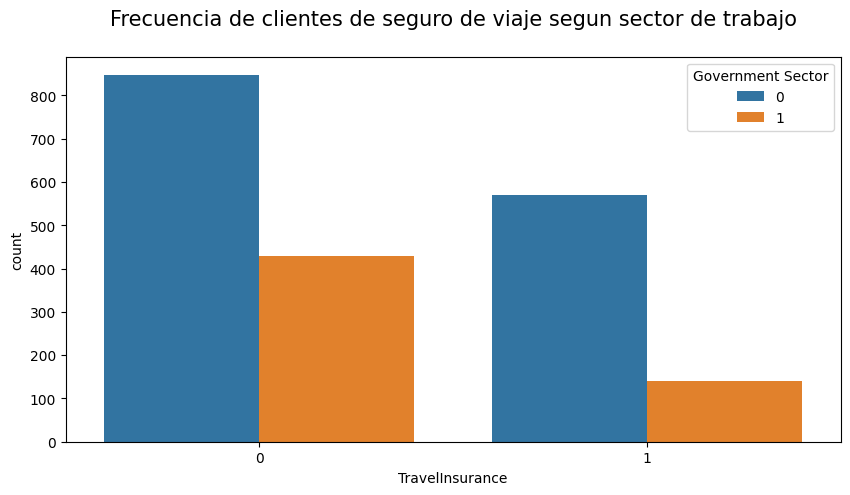

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['TravelInsurance'], hue= df['Government Sector'])
plt.title('Frecuencia de clientes de seguro de viaje segun sector de trabajo\n', fontdict={'fontsize':15})

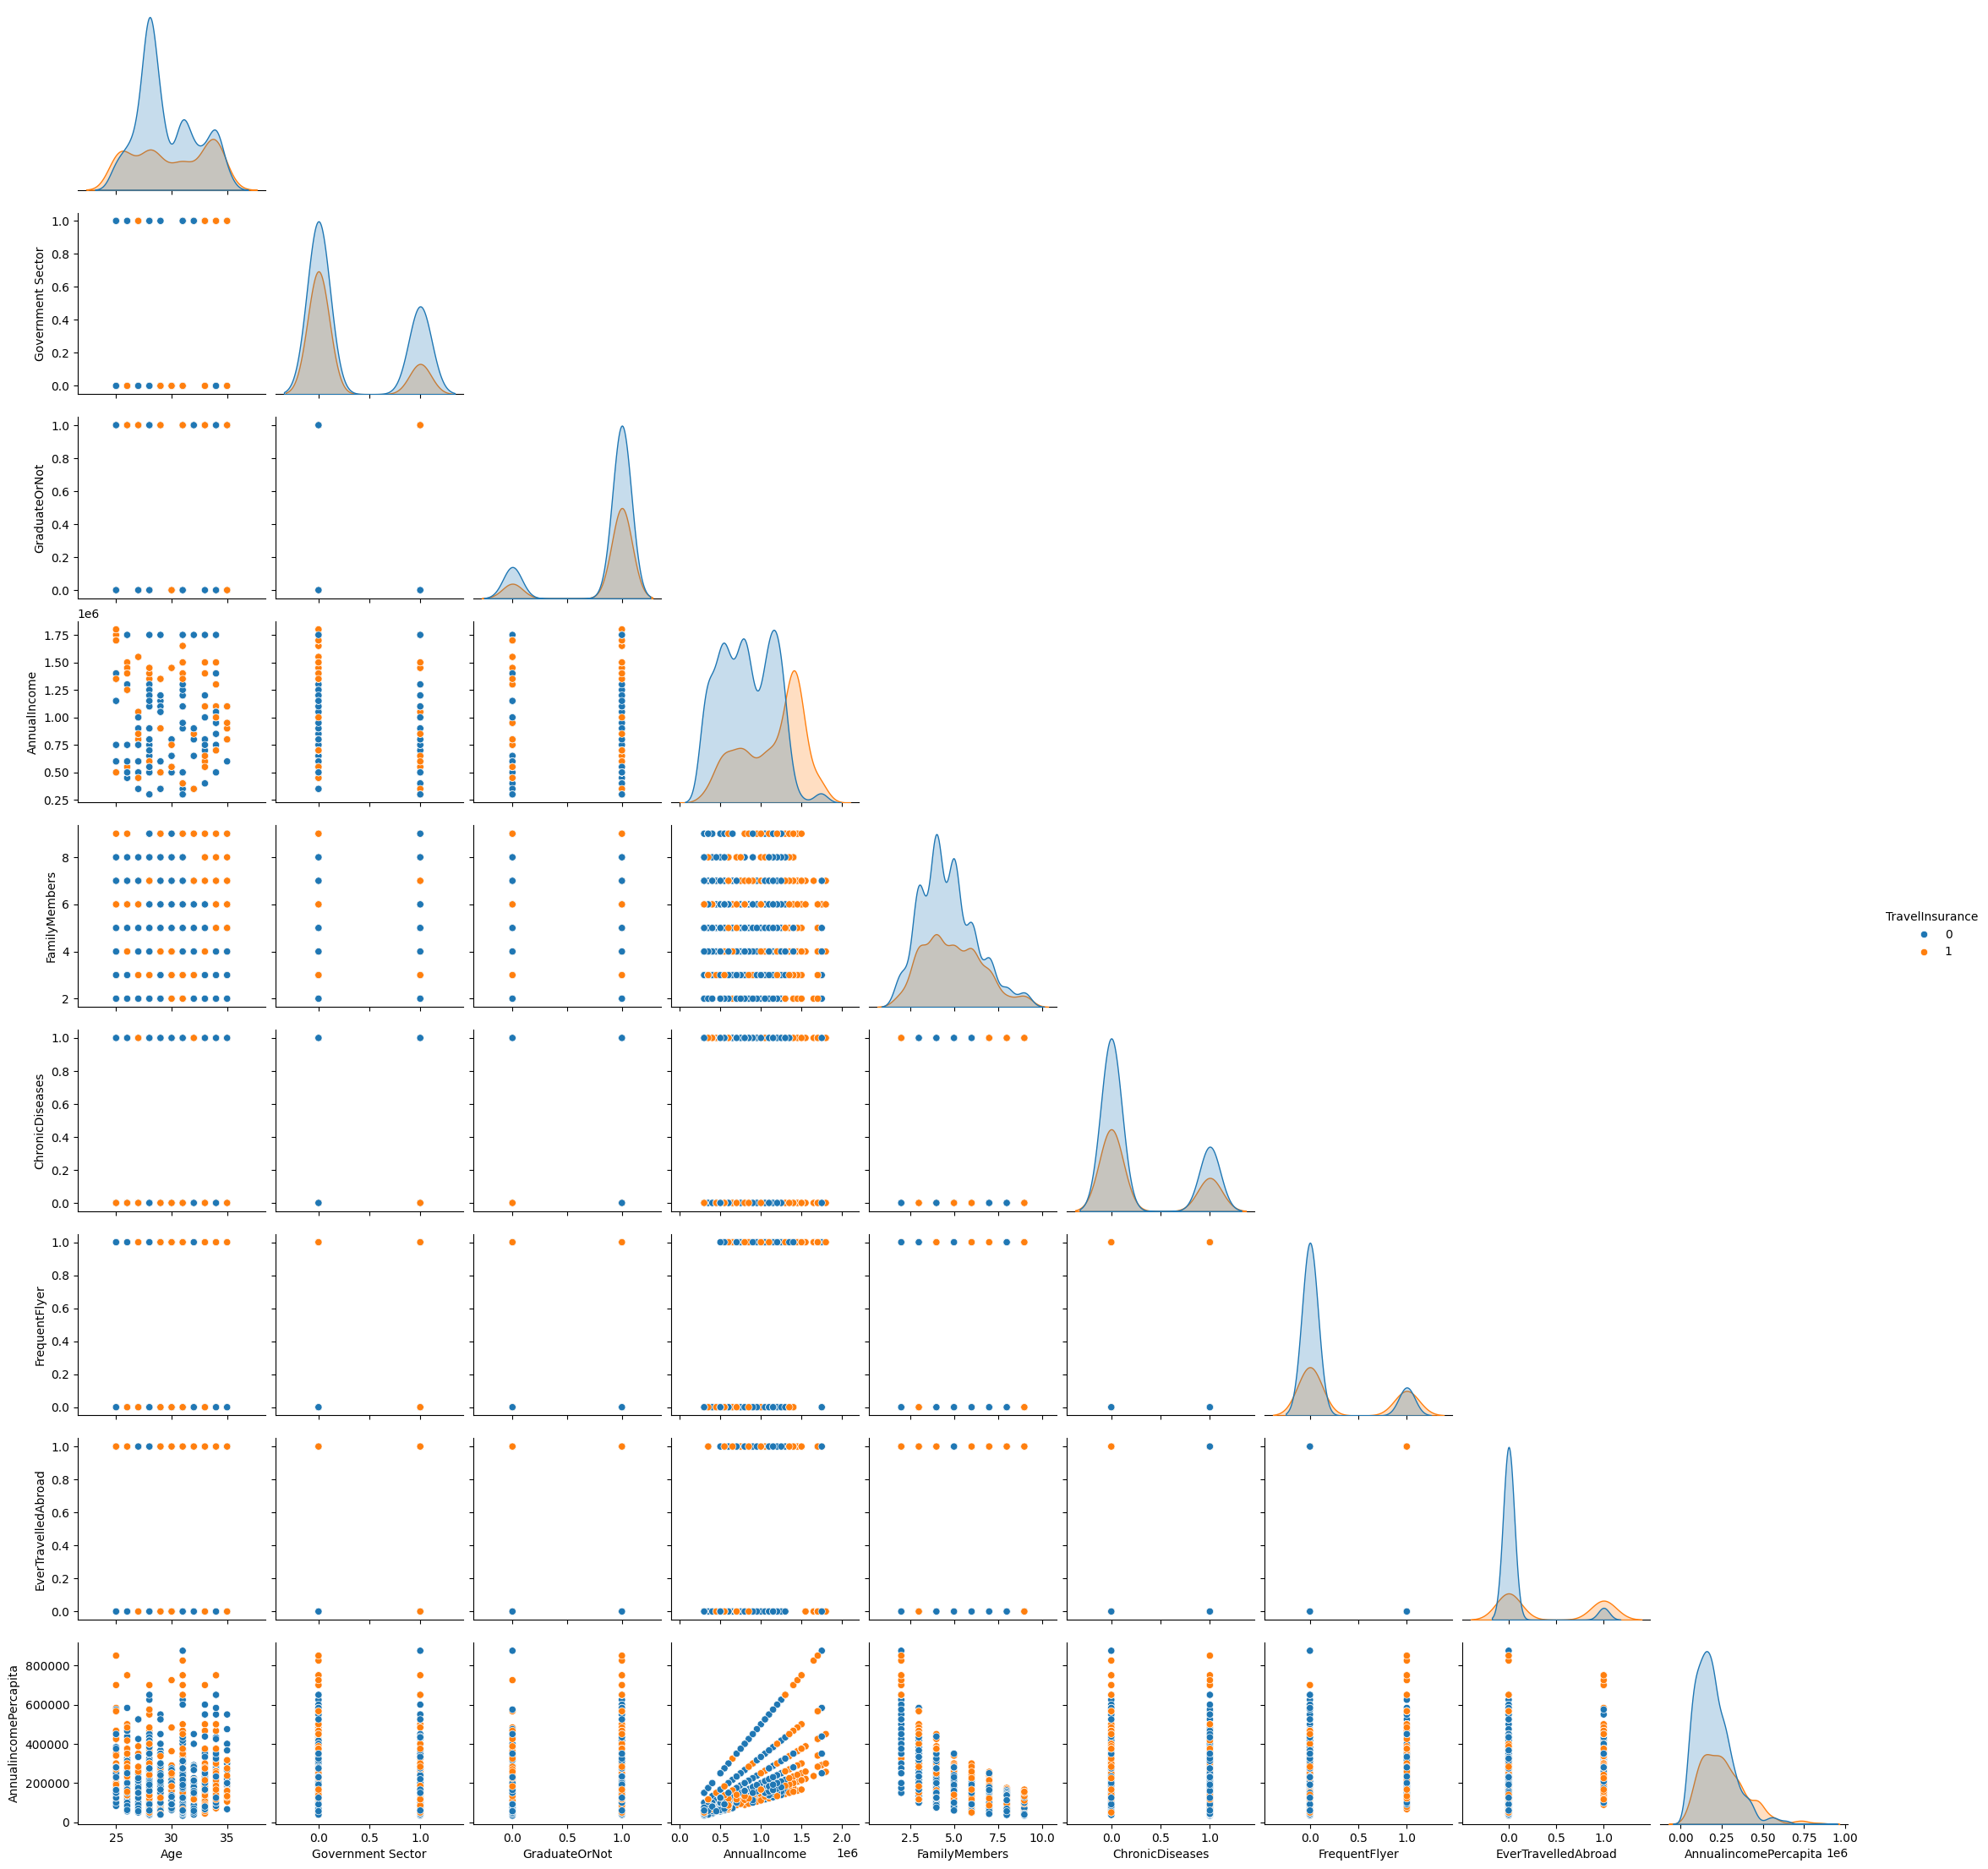

In [33]:
## relaciones entre variables
sns.pairplot(data=df, hue= 'TravelInsurance',corner= True)

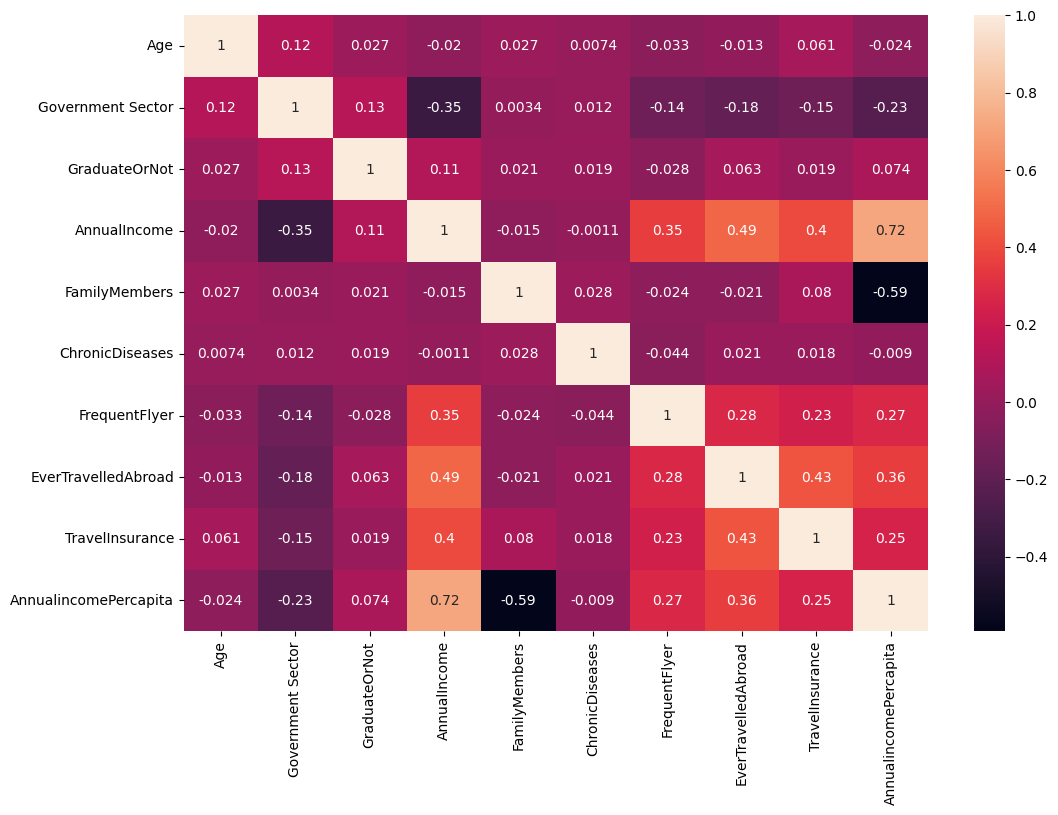

In [34]:
plt.figure(figsize=(12, 8))

corr1 = df.corr()
sns.heatmap(corr1,
            xticklabels = corr1.columns.values,
            yticklabels = corr1.columns.values,
            annot = True);

In [35]:
 ##solo los que contrataron seguro, esto para intentar hacer un perfil de quien contrata el seguro
si = df[(df['TravelInsurance']==1)]

si.head()

,Age,Government Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualincomePercapita
2,34,0,1,500000,4,1,0,0,1,125000.000
7,31,0,1,1350000,3,0,1,1,1,450000.000
8,28,0,1,1450000,6,1,1,1,1,241666.667
11,26,0,1,1400000,5,0,1,1,1,280000.000
12,32,1,1,850000,6,0,0,0,1,141666.667


In [36]:
si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 2 to 1985
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    710 non-null    int64  
 1   Government Sector      710 non-null    int64  
 2   GraduateOrNot          710 non-null    int64  
 3   AnnualIncome           710 non-null    int64  
 4   FamilyMembers          710 non-null    int64  
 5   ChronicDiseases        710 non-null    int64  
 6   FrequentFlyer          710 non-null    int64  
 7   EverTravelledAbroad    710 non-null    int64  
 8   TravelInsurance        710 non-null    int64  
 9   AnnualincomePercapita  710 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 61.0 KB


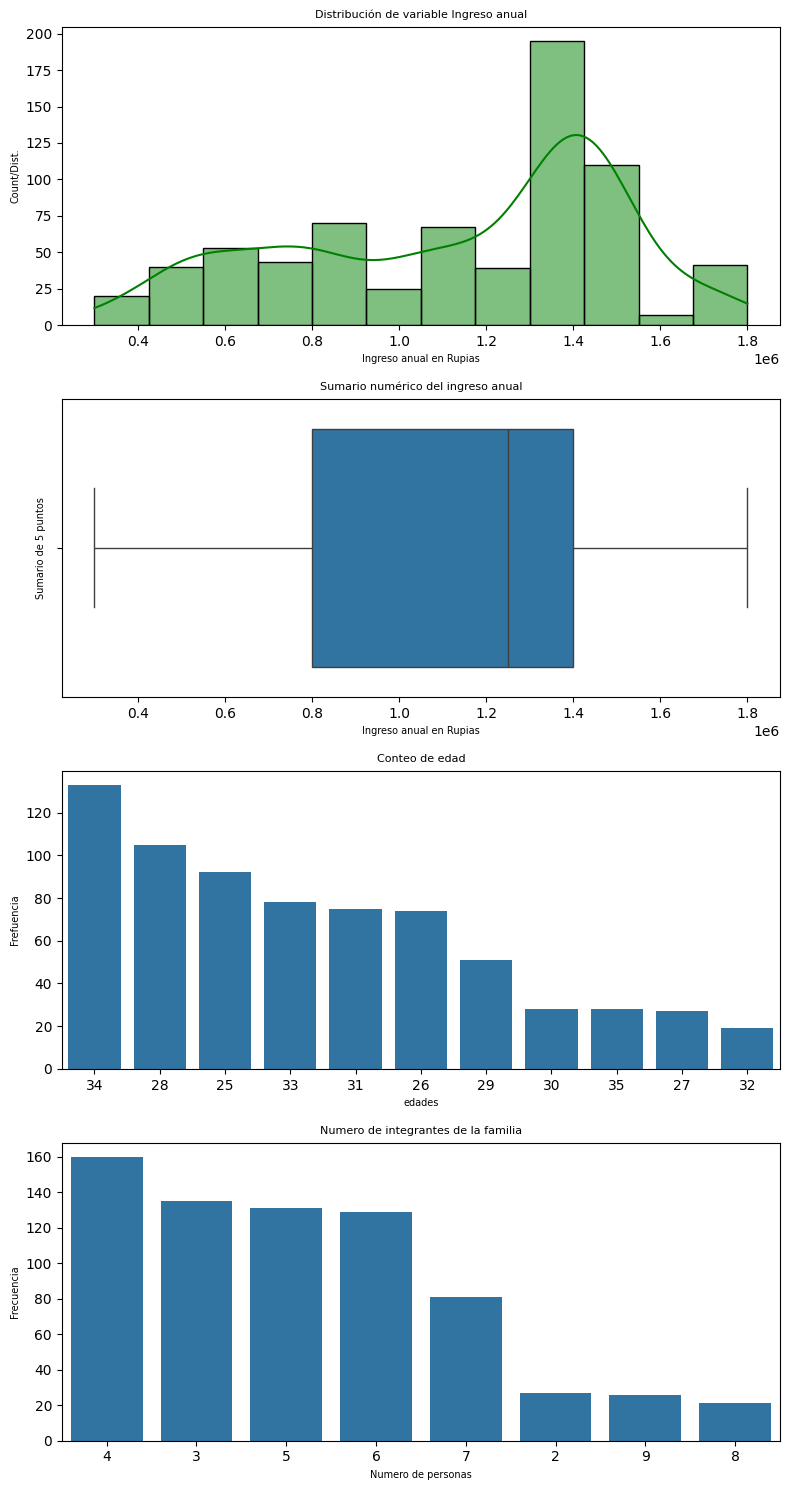

In [37]:
fig,axes = plt.subplots(4,1,dpi=100,figsize = (8,15))

plot0=sns.histplot(x = si['AnnualIncome'],ax=axes[0],color='green', kde=True)
axes[0].set_title('Distribución de variable Ingreso anual',fontdict={'fontsize':8})
axes[0].set_xlabel('Ingreso anual en Rupias',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(x = si['AnnualIncome'],ax=axes[1])
axes[1].set_title('Sumario numérico del ingreso anual',fontdict={'fontsize':8})
axes[1].set_xlabel('Ingreso anual en Rupias',fontdict={'fontsize':7})
axes[1].set_ylabel('Sumario de 5 puntos',fontdict={'fontsize':7})
plt.tight_layout()

plot2=sns.countplot(x = si['Age'], order= si['Age'].value_counts().index,ax=axes[2])
axes[2].set_title('Conteo de edad',fontdict={'fontsize':8})
axes[2].set_xlabel('edades',fontdict={'fontsize':7})
axes[2].set_ylabel('Frefuencia',fontdict={'fontsize':7})
plt.tight_layout()

plot3=sns.countplot(x = si['FamilyMembers'], order=si['FamilyMembers'].value_counts().index ,ax=axes[3])
axes[3].set_title('Numero de integrantes de la familia',fontdict={'fontsize':8})
axes[3].set_xlabel('Numero de personas',fontdict={'fontsize':7})
axes[3].set_ylabel('Frecuencia',fontdict={'fontsize':7})
plt.tight_layout()



In [38]:
### SOLO PORQUE QUERIA PROBAR PLOTLY
px.box(si.AnnualIncome)


In [39]:
px.box(si.AnnualincomePercapita)

In [40]:
px.pie(si, values='TravelInsurance', names = 'Government Sector')

In [41]:
### SUELDOS PROMEDIO SEGÚN SECTOR DE TRABAJO

g = si.groupby('Government Sector').mean()['AnnualIncome']
g

Government Sector
0    1.187105e+06
1    9.139286e+05
Name: AnnualIncome, dtype: float64

<Axes: xlabel='Government Sector'>

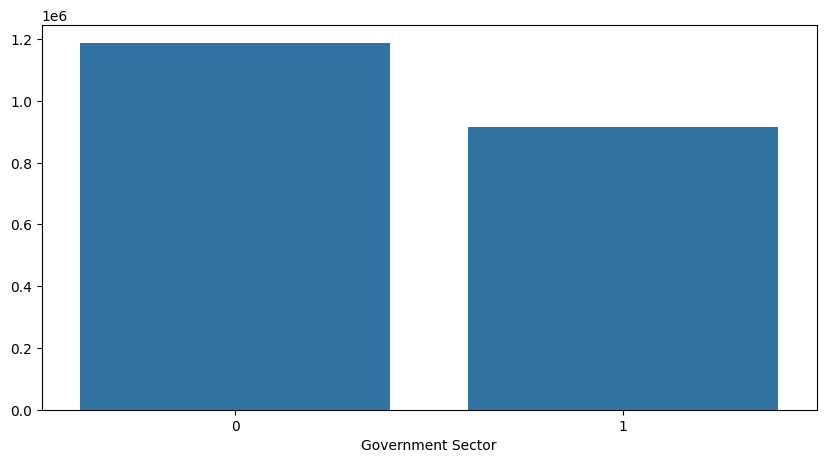

In [42]:
sns.barplot(x =g.index, y =g.values)

In [43]:
ndf = si.drop(columns='TravelInsurance')

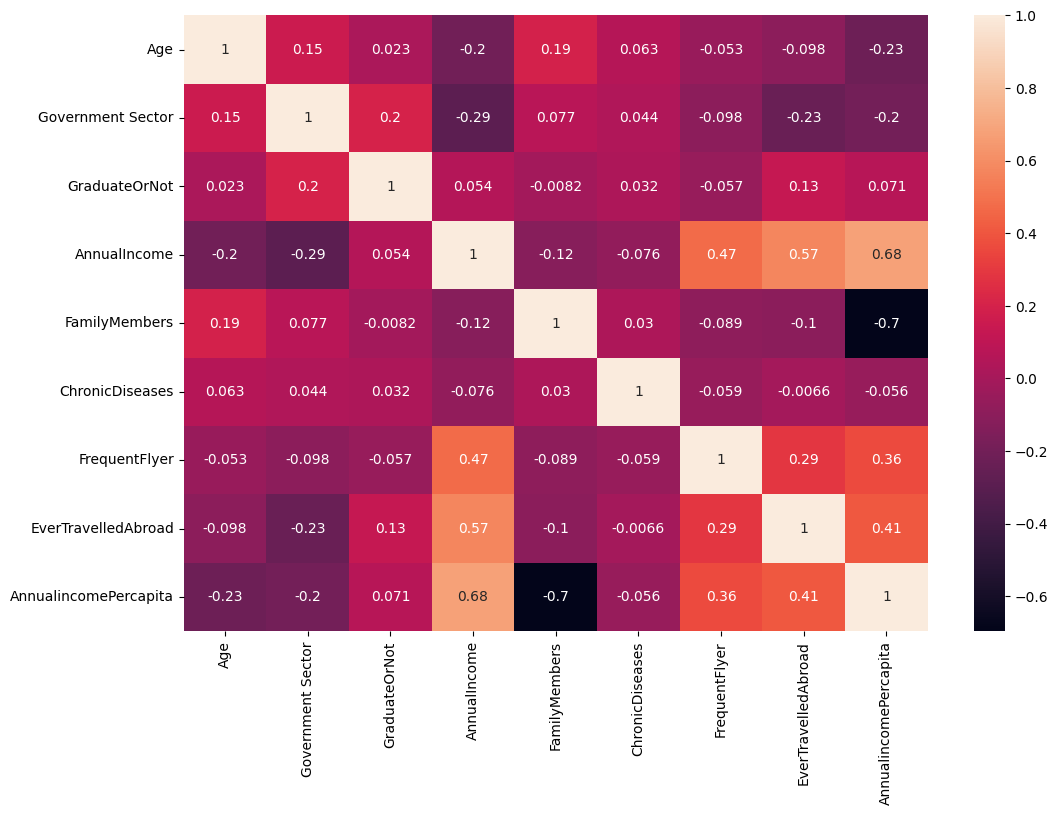

In [44]:


plt.figure(figsize=(12, 8))

corr2 = ndf.corr()
sns.heatmap(corr2,
            xticklabels = corr2.columns.values,
            yticklabels = corr2.columns.values,
            annot = True);

In [45]:
fig = px.imshow(corr2, text_auto=True, aspect= 'auto')
fig.show()

In [46]:
corr2

,Age,Government Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,AnnualincomePercapita
Age,1.000000,0.153722,0.023184,-0.204103,0.193494,0.063300,-0.053182,-0.097585,-0.225052
Government Sector,0.153722,1.000000,0.199491,-0.290163,0.076938,0.043568,-0.098334,-0.234991,-0.197665
GraduateOrNot,0.023184,0.199491,1.000000,0.053630,-0.008219,0.032161,-0.057430,0.128131,0.070876
AnnualIncome,-0.204103,-0.290163,0.053630,1.000000,-0.115212,-0.075621,0.474677,0.571384,0.680195
FamilyMembers,0.193494,0.076938,-0.008219,-0.115212,1.000000,0.030212,-0.089141,-0.101684,-0.696201
ChronicDiseases,0.063300,0.043568,0.032161,-0.075621,0.030212,1.000000,-0.059239,-0.006564,-0.056346
FrequentFlyer,-0.053182,-0.098334,-0.057430,0.474677,-0.089141,-0.059239,1.000000,0.288002,0.359371
EverTravelledAbroad,-0.097585,-0.234991,0.128131,0.571384,-0.101684,-0.006564,0.288002,1.000000,0.410016
AnnualincomePercapita,-0.225052,-0.197665,0.070876,0.680195,-0.696201,-0.056346,0.359371,0.410016,1.000000
